# DESCISION TREE

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\91949\\Desktop\\data science"
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)


# Training and visualizing a decision tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris=load_iris()

In [4]:
x=iris.data[:,2:]

In [5]:
y=iris.target

In [6]:
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

You	can	visualize	the	trained	Decision	Tree	by	first	using	the	export_graphviz()	method	to	output	a graph	definition	file	called	iris_tree.dot:


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
                out_file=image_path('iris_tree.dot'),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
               rounded=True,filled=True)

Then	you	can	convert	this	.dot	file	to	a	variety	of	formats	such	as	PDF	or	PNG	using	the	dot	commandline	tool	from	the	graphviz	package.1	This	command	line	converts	the	.dot	file	to	a	.png	image	file:
$	dot	-Tpng	iris_tree.dot	-o	iris_tree.png


# Making	Predictions 

Suppose	you	find	an	iris	flower	and you	want	to	classify	it.	You	start	at	the	root	node	(depth	0,	at	the	top):	this	node	asks	whether	the	flower’s petal	length	is	smaller	than	2.45	cm.	If	it	is,	then	you	move	down	to	the	root’s	left	child	node	(depth	1, left).	In	this	case,	it	is	a	leaf	node	(i.e.,	it	does	not	have	any	children	nodes),	so	it	does	not	ask	any questions:	you	can	simply	look	at	the	predicted	class	for	that	node	and	the	Decision	Tree	predicts	that your	flower	is	an	Iris-Setosa	(class=setosa). 

Now	suppose	you	find	another	flower,	but	this	time	the	petal	length	is	greater	than	2.45	cm.	You	must move	down	to	the	root’s	right	child	node	(depth	1,	right),	which	is	not	a	leaf	node,	so	it	asks	another question:	is	the	petal	width	smaller	than	1.75	cm?	If	it	is,	then	your	flower	is	most	likely	an	IrisVersicolor	(depth	2,	left).	If	not,	it	is	likely	an	Iris-Virginica	(depth	2,	right).

""""One	of	the	many	qualities	of	Decision	Trees	is	that	they	require	very	little	data	preparation.	In	particular,	they	don’t	require feature	scaling	or	centering	at	all.""""

A	node’s	samples	attribute	counts	how	many	training	instances	it	applies	to.	For	example,	100	training instances	have	a	petal	length	greater	than	2.45	cm	(depth	1,	right),	among	which	54	have	a	petal	width smaller	than	1.75	cm	(depth	2,	left).	A	node’s	value	attribute	tells	you	how	many	training	instances	of each	class	this	node	applies	to:	for	example,	the	bottom-right	node	applies	to	0	Iris-Setosa,	1	IrisVersicolor,	and	45	Iris-Virginica.	Finally,	a	node’s	gini	attribute	measures	its	impurity:	a	node	is	“pure” (gini=0)	if	all	training	instances	it	applies	to	belong	to	the	same	class.	For	example,	since	the	depth-1 left	node	applies	only	to	Iris-Setosa	training	instances,	it	is	pure	and	its	gini	score	is	0.	Equation	6-1 shows	how	the	training	algorithm	computes	the	gini	score	Gi	of	the	ith	node.	For	example,	the	depth-2	left node	has	a	gini	score	equal	to	1	–	(0/54)2	–	(49/54)2	–	(5/54)2	≈	0.168.

Saving figure decision_tree_decision_boundaries_plot


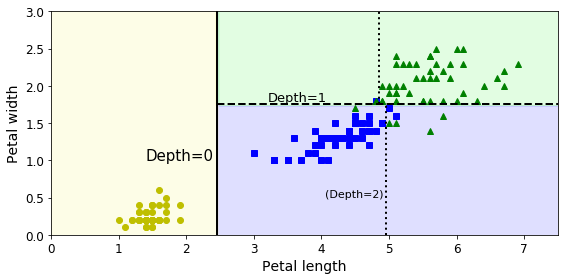

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, x, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(x[:, 0][y==2], x[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, x, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

this	Decision	Tree’s	decision	boundaries.	The	thick	vertical	line	represents	the	decision boundary	of	the	root	node	(depth	0):	petal	length	=	2.45	cm.	Since	the	left	area	is	pure	(only	Iris-Setosa), it	cannot	be	split	any	further.	However,	the	right	area	is	impure,	so	the	depth-1	right	node	splits	it	at	petal width	=	1.75	cm	(represented	by	the	dashed	line).	Since	max_depth	was	set	to	2,	the	Decision	Tree	stops right	there.	However,	if	you	set	max_depth	to	3,	then	the	two	depth-2	nodes	would	each	add	another decision	boundary	(represented	by	the	dotted	lines).


1.As	you	can	see	Decision	Trees	are	fairly	intuitive	and	their	decisions	are	easy	to	interpret.	Such	models	are	often	called	""white	box models""

2.Random	Forests	or	neural	networks	are	generally	considered	black	box	models.	

3.They	make	great predictions,	and	you	can	easily	check	the	calculations	that	they	performed	to	make	these	predictions;	nevertheless,	it	is	usually	hard	to explain	in	simple	terms	why	the	predictions	were	made

4.if	a	neural	network	says	that	a	particular	person	appears	on	a picture,	it	is	hard	to	know	what	actually	contributed	to	this	prediction:	did	the	model	recognize	that	person’s	eyes?	Her	mouth?	Her	nose? Her	shoes?	Or	even	the	couch	that	she	was	sitting	on?	Conversely,	Decision	Trees	provide	nice	and	simple	classification	rules	that	can even	be	applied	manually	if	need	be	(e.g.,	for	flower	classification).

# Estimating	Class	Probabilities 

In [9]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5,1.5]])

array([1])

In [11]:
tree_clf.predict([[6,1.5]])

array([1])

# The	CART	Training	Algorithm

Scikit-Learn	uses	the	Classification	And	Regression	Tree	(CART)	algorithm	to	train	Decision	Trees	(also called	“growing”	trees).	The	idea	is	really	quite	simple:	the	algorithm	first	splits	the	training	set	in	two subsets	using	a	single	feature	k	and	a	threshold	tk	(e.g.,	“petal	length	≤	2.45	cm”).	How	does	it	choose	k and	tk?	It	searches	for	the	pair	(k,	tk)	that	produces	the	purest	subsets	(weighted	by	their	size).	

In [12]:
from sklearn.datasets import make_moons
xm,ym=make_moons(n_samples=100,noise=0.25,random_state=53)

In [13]:
xm.shape

(100, 2)

In [14]:
ym.shape

(100,)

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_clf1=DecisionTreeClassifier()
tree_clf2=DecisionTreeClassifier(min_samples_leaf=4)

In [16]:
tree_clf1.fit(xm,ym)
tree_clf2.fit(xm,ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

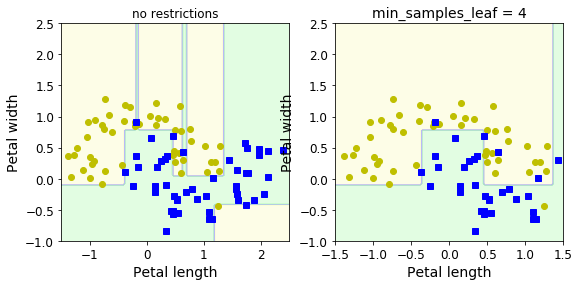

In [17]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.title('no restrictions')
plot_decision_boundary(tree_clf1,xm,ym,axes=[-1.5,2.5,-1,2.5])
plt.subplot(122)
plt.title("min_samples_leaf = {}".format(tree_clf2.min_samples_leaf), fontsize=14)
plot_decision_boundary(tree_clf2,xm,ym,axes=[-1.5,1.5,-1,2.5])

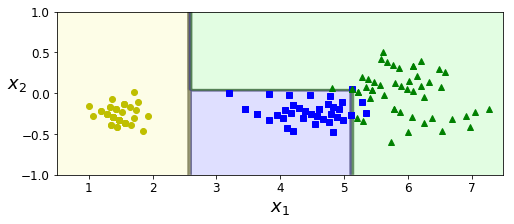

In [19]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
xr = x.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


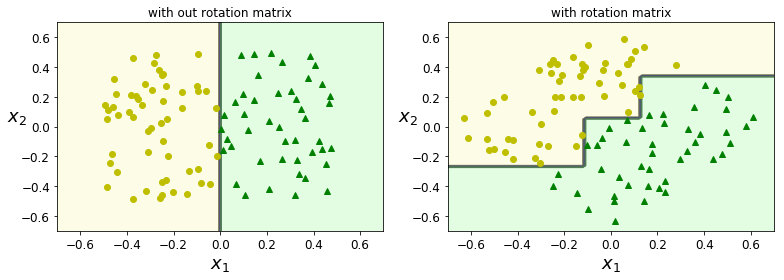

In [21]:
np.random.seed(6)
xs = np.random.rand(100, 2) - 0.5
ys = (xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
xsr = xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.title('with out rotation matrix')
plot_decision_boundary(tree_clf_s, xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plt.title('with rotation matrix')
plot_decision_boundary(tree_clf_sr, xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

Hopefully	by	now	you	are	convinced	that	Decision	Trees	have	a	lot	going	for	them:	they	are	simple	to understand	and	interpret,	easy	to	use,	versatile,	and	powerful.	However	they	do	have	a	few	limitations. First,	as	you	may	have	noticed,	Decision	Trees	love	orthogonal	decision	boundaries	(all	splits	are perpendicular	to	an	axis),	which	makes	them	sensitive	to	training	set	rotation.	For	example,	Figure	6-7 shows	a	simple	linearly	separable	dataset:	on	the	left,	a	Decision	Tree	can	split	it	easily,	while	on	the right,	after	the	dataset	is	rotated	by	45°,	the	decision	boundary	looks	unnecessarily	convoluted.	Although both	Decision	Trees	fit	the	training	set	perfectly,	it	is	very	likely	that	the	model	on	the	right	will	not generalize	well.	One	way	to	limit	this	problem	is	to	use	PCA	(see	Chapter	8),	which	often	results	in	a better	orientation	of	the	training	data.


# Regression Trees

Decision	Trees	are	also	capable	of	performing	regression	tasks

In [25]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Saving figure tree_regression_plot


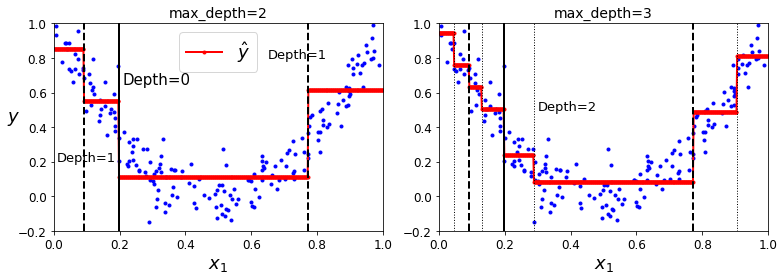

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(x, y)
tree_reg2.fit(x, y)

def plot_regression_predictions(tree_reg, x, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(x, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, x, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, x, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [28]:
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [29]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(x, y)
tree_reg2.fit(x, y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [30]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)


Saving figure tree_regression_regularization_plot


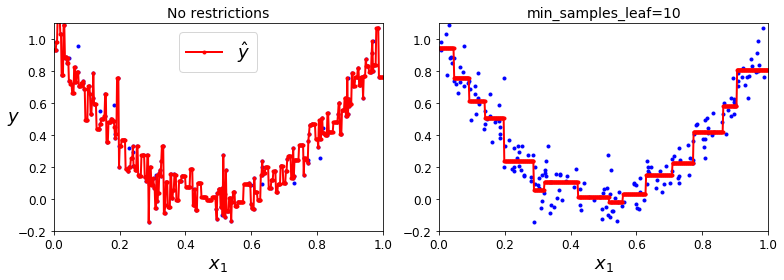

In [32]:

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(x, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(x, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()
